<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd# импорт библиотеки pandas
import matplotlib.pyplot as plt
import seaborn as sns
from pymystem3 import Mystem# подключим библиотеку с функцией лемматизации на русском языке
from collections import Counter# подсчёт числа упоминаний слов в тексте
m = Mystem() 
pd.set_option('display.max_columns', None)
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')# чтение файла с данными и сохранение в data
data.head(10)# получение первых 10 строк таблицы data


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data.info()# получение общей информации о данных в таблице data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Описание данных**

В таблице двадцать два столбца

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м);
* `balcony` - число балконов;
* `ceiling_height` - высота потолков (м);
* `cityCenters_nearest` — расстояние до центра города (м);
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия);
* `first_day_exposition` — дата публикации;
* `floor` — этаж;
* `floors_total` — всего этажей в доме;
* `is_apartment` — апартаменты (булев тип);
* `kitchen_area` — площадь кухни в квадратных метрах (м²);
* `last_price` — цена на момент снятия с публикации;
* `living_area` — жилая площадь в квадратных метрах (м²);
* `locality_name` — название населённого пункта;
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio`— квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении



### Вывод

1. Количество значений в столбцах различается. Значит, в данных есть пропущенные значения. 
2. Названия некоторых столбцов не соответствуют правилам написания
3. Тип некоторых столбцов не соответсвует описанию

В каждой строке таблицы — данные о квартире. Учитывая,что часть данных вписана атоматически, попытаемся найти взаимосвязь недостающих данных и то, что получено автоматически. Скорей всего можно определить высоту потолков, если есть группа квартир в одном районе, если продается квартира- то это уже не апартаменты, жилую площадь можно оценить из общей, балконы если не показаны значит их нет, пропуски в данных о  поселках можно заменить аналогичными если есть данные  хотя бы по одному объекту, ошибка  расстояния до центра, парки, озера, аэропорт бужет незначительна. 

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных.


## Предобработка данных

In [3]:
# перечень названий столбцов таблицы data
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [4]:
data=data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest','parks_around3000':'parks_around_3000','ponds_around3000':'ponds_around_3000'})# переименование столбцов

In [5]:
data.columns# проверка результатов - перечень названий столбцов

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
display(data.isna().sum()) # подсчёт пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
display(data.isna().mean()) # подсчёт доли пропусков

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
city_centers_nearest    0.232879
parks_around_3000       0.232837
parks_nearest           0.659100
ponds_around_3000       0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

In [8]:
display(data['locality_name'].unique())# проверка населенных пуктов
display(data['locality_name'].value_counts())# подсчет количества по населенных пуктов
display(len (data[data['locality_name'].isna()]))


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Санкт-Петербург           15721
посёлок Мурино              522
посёлок Шушары              440
Всеволожск                  398
Пушкин                      369
                          ...  
поселок Калитино              1
поселок Жилпосёлок            1
деревня Рапполово             1
посёлок Петро-Славянка        1
деревня Щеглово               1
Name: locality_name, Length: 364, dtype: int64

49

Имеется 49 населенных пунктов с неизвестными именами заменим это населенный пункт на `unknown`

In [9]:
data['locality_name'] = data['locality_name'].fillna('unknown')

#проверка замены 
display(len (data[data['locality_name'].isna()]))

0

In [10]:
display(data['rooms'].unique())# проверка комнат
display(data['rooms'].value_counts())# подсчет количества по комнатам

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

In [11]:

display (data.loc[data['rooms']==0].head())
#Количество комнат рано 0 возможно это малосемейка или общежитие т.к площадь маленькая, возможно удобства общие,
# эти квартиры можно выделить в отдельную группу (Другие) или исключить из расчета


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,NaN,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.00,1,NaN,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,NaN,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.30,19,NaN,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,NaN,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0


In [12]:
display (data.loc[data['rooms']==15].head())#хорошая квартира быстро продалась за 14 дней

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.5,6.0,409.0,3,NaN,False,False,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0


In [13]:
display (data.loc[data['rooms']==16].head())#квартира большая, кухня маленькая, жилая площадь маленькая 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
18848,6,28500000.0,270.0,2015-03-02T00:00:00,16,3.0,4.0,180.0,4,NaN,False,False,13.0,1.0,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0


In [14]:
display (data.loc[data['rooms']==19].head())#квартира большая, не указана высота потолков

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
14498,6,32250000.0,374.6,2018-06-09T00:00:00,19,NaN,5.0,264.5,2,NaN,False,False,27.6,NaN,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0


In [15]:
display (data.loc[data['rooms']==12].head())#квартира большая, далеко от центра, жилая менее 50% от общей площади

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,NaN,False,False,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


In [16]:
display (data.loc[data['rooms']==11].head())#квартира большая

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
648,3,17500000.0,183.7,2018-07-01T00:00:00,11,3.40,7.0,138.8,7,NaN,False,False,13.3,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
9688,8,33000000.0,194.1,2017-02-07T00:00:00,11,3.43,5.0,129.0,2,NaN,False,False,11.9,NaN,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0


In [17]:
display (data.loc[data['rooms']==14].head())#квартира большая, кухня маленькая, жилая площадь маленькая 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
866,5,25000000.0,363.0,2017-12-23T00:00:00,14,3.16,5.0,222.0,4,NaN,False,False,16.6,NaN,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
20829,6,28659000.0,245.4,2016-03-31T00:00:00,14,NaN,4.0,168.3,2,NaN,False,False,25.9,0.0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0


In [18]:
display (data.loc[data['rooms']==10].head())#квартира большая

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
4149,6,23000000.0,272.6,2018-01-11T00:00:00,10,3.14,7.0,145.9,7,NaN,False,False,18.8,1.0,Санкт-Петербург,10726.0,12169.0,1.0,191.0,1.0,531.0,NaN
18119,4,15500000.0,216.1,2016-07-04T00:00:00,10,3.15,5.0,161.4,2,NaN,False,False,19.8,0.0,Санкт-Петербург,24353.0,4921.0,1.0,368.0,0.0,NaN,11.0
18891,11,40000000.0,290.0,2016-06-21T00:00:00,10,3.50,6.0,189.4,6,NaN,False,False,30.0,1.0,Санкт-Петербург,26229.0,4932.0,3.0,316.0,1.0,227.0,77.0


In [19]:
display (data.loc[data['rooms']==9].head(10))#квартира 9 комнат

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8822,14,49968900.0,398.0,2017-07-12T00:00:00,9,3.00,2.0,160.1,1,False,False,False,41.0,NaN,Санкт-Петербург,17720.0,16722.0,3.0,471.0,2.0,440.0,471.0
8860,12,17000000.0,235.0,2018-07-14T00:00:00,9,3.00,6.0,NaN,3,NaN,False,False,NaN,NaN,Санкт-Петербург,24466.0,5034.0,1.0,346.0,0.0,NaN,90.0
9550,10,23500000.0,313.0,2017-02-13T00:00:00,9,3.20,6.0,179.2,5,NaN,False,False,13.2,NaN,Санкт-Петербург,38435.0,10138.0,1.0,146.0,0.0,NaN,NaN
13019,0,22250000.0,249.9,2019-04-23T00:00:00,9,3.20,5.0,157.0,5,NaN,False,False,12.4,NaN,Санкт-Петербург,10328.0,9987.0,2.0,352.0,0.0,NaN,NaN
13397,14,19500000.0,309.7,2016-02-03T00:00:00,9,NaN,5.0,199.0,5,NaN,False,False,14.3,0.0,Санкт-Петербург,10328.0,9987.0,2.0,352.0,0.0,NaN,468.0
15151,15,88000000.0,400.0,2019-03-27T00:00:00,9,2.50,2.0,250.0,1,NaN,False,False,50.0,NaN,Санкт-Петербург,24395.0,2725.0,2.0,315.0,1.0,578.0,NaN
16915,14,29000000.0,292.2,2017-01-12T00:00:00,9,3.35,5.0,225.9,4,NaN,False,False,32.9,1.0,Санкт-Петербург,24892.0,5162.0,2.0,263.0,0.0,NaN,825.0
20791,0,24000000.0,250.0,2019-04-23T00:00:00,9,3.20,5.0,160.6,3,NaN,False,False,11.7,NaN,Санкт-Петербург,10328.0,9987.0,2.0,352.0,0.0,NaN,NaN


In [20]:
display(data['is_apartment'].unique())# проверка апартаментов
display(data['is_apartment'].value_counts())# подсчет количества по апартаментам

array([nan, False, True], dtype=object)

False    2725
True       50
Name: is_apartment, dtype: int64

In [21]:
display (data.loc[data['is_apartment']==True].head(10))#апартаменты с True

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
543,11,12790000.0,56.6,2018-11-06T00:00:00,2,3.50,3.0,29.40,1,True,False,False,NaN,NaN,Петергоф,35248.0,30437.0,3.0,53.0,3.0,22.0,NaN
916,11,8183000.0,70.0,2018-01-11T00:00:00,2,3.12,3.0,40.00,3,True,False,False,NaN,2.0,Санкт-Петербург,45796.0,21729.0,0.0,NaN,1.0,754.0,179.0
1109,1,34878556.0,95.8,2014-12-09T00:00:00,2,NaN,6.0,58.30,5,True,False,False,20.00,1.0,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1572.0
1608,12,2150000.0,20.1,2019-01-30T00:00:00,1,NaN,9.0,NaN,1,True,False,False,NaN,NaN,Санкт-Петербург,26646.0,12147.0,0.0,NaN,0.0,NaN,13.0
2759,11,7500000.0,152.0,2018-07-27T00:00:00,3,3.00,3.0,NaN,1,True,False,False,NaN,1.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,7.0
2975,9,4931398.0,42.9,2018-07-23T00:00:00,1,3.15,4.0,20.39,3,True,False,False,10.29,NaN,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,273.0
3067,13,6600000.0,95.0,2018-09-08T00:00:00,2,4.50,7.0,45.00,7,True,False,False,25.00,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,96.0
3816,4,4779000.0,53.1,2016-05-16T00:00:00,1,NaN,13.0,19.80,6,True,False,False,15.90,2.0,Санкт-Петербург,19396.0,4516.0,0.0,NaN,1.0,826.0,60.0
3951,10,4300000.0,50.0,2019-04-20T00:00:00,1,3.00,11.0,17.00,9,True,False,False,12.00,2.0,Санкт-Петербург,10143.0,11367.0,0.0,NaN,0.0,NaN,NaN
4339,19,6900000.0,72.0,2019-03-25T00:00:00,3,3.50,4.0,70.00,1,True,False,False,NaN,NaN,Санкт-Петербург,31487.0,4466.0,2.0,353.0,1.0,439.0,22.0


In [22]:
display (data.loc[data['is_apartment']==False].head(10))#апартаменты с False

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
11,9,3300000.0,44.0,2018-08-27T00:00:00,2,NaN,5.0,31.0,4,False,False,False,6.0,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
25,3,6800000.0,76.0,2015-10-01T00:00:00,2,2.75,23.0,39.0,18,False,False,False,15.0,2.0,Санкт-Петербург,34967.0,14640.0,0.0,NaN,1.0,564.0,300.0
29,9,8600000.0,100.0,2016-04-09T00:00:00,3,NaN,19.0,52.0,15,False,False,False,11.0,0.0,Санкт-Петербург,30394.0,11526.0,1.0,532.0,1.0,896.0,125.0
36,13,3790000.0,45.0,2017-01-25T00:00:00,2,NaN,9.0,27.0,9,False,False,False,6.3,2.0,Санкт-Петербург,49574.0,16461.0,1.0,459.0,0.0,NaN,139.0
41,16,7900000.0,74.0,2016-05-04T00:00:00,3,NaN,14.0,59.0,8,False,False,False,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
42,13,22000000.0,161.8,2015-07-08T00:00:00,4,2.80,4.0,80.9,2,False,False,False,17.6,5.0,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0
50,1,4500000.0,48.2,2017-11-13T00:00:00,1,2.70,5.0,25.4,4,False,False,False,9.0,1.0,Пушкин,19841.0,30183.0,1.0,531.0,3.0,330.0,152.0
56,14,4350000.0,41.0,2016-03-28T00:00:00,1,2.80,7.0,18.1,4,False,False,False,11.1,2.0,Санкт-Петербург,13772.0,9626.0,1.0,271.0,1.0,439.0,152.0
66,6,3450000.0,34.0,2015-12-16T00:00:00,1,2.60,17.0,17.4,8,False,False,False,11.5,2.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,186.0
69,6,4010000.0,50.7,2018-09-16T00:00:00,2,2.60,5.0,28.9,5,False,False,False,9.0,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,194.0


In [23]:
# Если апартаменты не указаны, то значит это жилой фонд. Замени все пропуски на False
data['is_apartment'] = data['is_apartment'].fillna(False)
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,False,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [24]:
data['is_apartment'] = data['is_apartment'].astype('bool')# перевод из object в bool
display(data.head(10))# вывод первых 10 значений

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,False,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [25]:
#Заменим все строки с пропусками в столбце 'ponds_nearest', 'parks_nearest' на 0 
#если в столбцах 'ponds_around_3000', 'parks_around_3000' стоит 0.
for i in range(len(data)):
    if data.loc[i,'ponds_around_3000']==0:
        data.loc[i,'ponds_nearest']=0
    if data.loc[i,'parks_around_3000']==0:
        data.loc[i,'parks_nearest']=0
        
display(len (data[data['ponds_nearest'].isna()]))#сосчитаем строки до ближайшего водоема
display(len (data[data['parks_nearest'].isna()]))#сосчитаем строки до ближайшего парка
# остались элементы у которых есть пропуски как 'ponds_nearest', 'parks_nearest', 
# так и 'ponds_around_3000', 'parks_around_3000'
display((data[data['parks_nearest'].isna()]).head())#ближайший парк
display((data[data['ponds_nearest'].isna()]).head())#ближайшее водоема

5518

5518

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,False,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,False,False,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,False,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,False,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,False,False,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,False,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0


Учитывая что явной корреляции по высоте потолков нет от чего либо, кроме как от апартаментов, то можно медианой забить высоту потолков.

In [26]:
display(data.corr())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,0.010532,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,0.013015,-0.011553,-0.012216,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,0.026958,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,0.070671,0.159996,0.030592,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,0.029633,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,0.080404,0.162346,0.036403,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,0.000399,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,0.053783,0.092693,0.019724,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.154959,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,0.030194,0.078209,0.003429,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,-0.026351,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,-0.125720,-0.122735,-0.039397,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,0.026969,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,0.075004,0.148933,0.038577,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,-0.013294,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,-0.078698,-0.076312,-0.022631,-0.039463
is_apartment,0.010532,0.026958,0.029633,0.000399,0.154959,-0.026351,0.026969,-0.013294,1.000000,-0.003657,-0.002448,0.049034,0.043119,0.016470,0.003732,0.020767,-0.015380,0.023989,0.016944,0.015262
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,-0.003657,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,-0.019680,0.000939,0.007226,-0.022476


In [27]:
#выбираем апартаменты False и берем медиану
is_apartment_false_median=data[data['is_apartment'] == False]['ceiling_height'].median()
display(is_apartment_false_median)

2.65

In [28]:
#выбираем апартаменты True и берем медиану
is_apartment_true_median=data[data['is_apartment'] == True]['ceiling_height'].median()
display(is_apartment_true_median)

3.0

In [29]:
#Замена на медианные значения
data['ceiling_height']=data[data['is_apartment'] == False]['ceiling_height'].fillna(value=is_apartment_false_median)
data['ceiling_height'] = data['ceiling_height'].fillna(value=is_apartment_true_median)
display(data.head())


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [30]:
#проверка пустой строки
display(len(data[data['ceiling_height'].isna()]))

0

In [31]:
# Если балконы не указаны, то значит его нет. Замени все пропуски на 0
data['balcony'] = data['balcony'].fillna(0)
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [32]:
#проверяем пропуски в зависимости от населенного пункта
display(data[data['locality_name'] == 'посёлок Мурино'].head())
display(data[data['locality_name'] == 'Коммунар'].head())
display(data[data['locality_name'] == 'Пушкин'].head())
display(data[data['locality_name'] == 'Всеволожск'].head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
38,10,3150000.0,40.00,2018-03-29T00:00:00,1,2.75,18.0,16.30,9,False,False,False,11.60,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.0
60,3,2740000.0,35.00,2018-01-01T00:00:00,1,2.65,12.0,NaN,8,False,False,False,NaN,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
133,12,3150000.0,31.00,2018-03-23T00:00:00,1,2.65,25.0,NaN,6,False,False,False,NaN,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,78.0
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.65,24.0,15.50,2,False,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.65,9.0,NaN,2,False,False,False,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
541,0,1990000.0,42.0,2016-05-27T00:00:00,2,2.65,3.0,27.0,2,False,False,False,5.5,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,36.0
1801,11,2750000.0,53.0,2017-01-09T00:00:00,2,2.55,5.0,30.0,4,False,False,False,8.3,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1947,11,1400000.0,24.0,2018-06-15T00:00:00,1,2.55,5.0,10.0,5,False,False,False,6.0,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2019,12,2400000.0,35.5,2018-10-30T00:00:00,1,2.60,5.0,17.2,1,False,False,False,8.8,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,72.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
14,1,4400000.0,36.0,2016-06-23T00:00:00,1,2.65,6.0,17.0,1,False,False,False,8.0,0.0,Пушкин,20782.0,30759.0,0.0,0.0,1.0,96.0,203.0
28,8,4170000.0,44.0,2017-12-13T00:00:00,1,2.90,6.0,20.8,1,False,False,False,11.7,1.0,Пушкин,18557.0,30710.0,0.0,0.0,1.0,118.0,74.0
50,1,4500000.0,48.2,2017-11-13T00:00:00,1,2.70,5.0,25.4,4,False,False,False,9.0,1.0,Пушкин,19841.0,30183.0,1.0,531.0,3.0,330.0,152.0
109,2,7497600.0,62.5,2015-12-08T00:00:00,2,2.65,5.0,35.5,5,False,False,False,9.5,0.0,Пушкин,14517.0,26670.0,1.0,517.0,0.0,0.0,1048.0
126,10,4050000.0,51.0,2019-04-23T00:00:00,2,2.65,5.0,30.5,1,False,False,False,6.6,0.0,Пушкин,17974.0,32546.0,1.0,15.0,1.0,659.0,NaN


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
112,14,2500000.0,33.3,2018-03-27T00:00:00,1,2.55,9.0,19.0,3,False,False,False,7.0,2.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,226.0
198,7,2900000.0,35.0,2015-02-04T00:00:00,1,2.70,17.0,16.1,17,False,False,False,8.3,2.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,586.0
215,17,3700000.0,67.0,2018-09-07T00:00:00,3,2.70,9.0,42.2,8,False,False,False,5.5,0.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,10,5650000.0,61.4,2016-03-09T00:00:00,2,2.65,16.0,34.0,8,False,False,False,14.0,0.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,361.0
225,7,3350000.0,58.9,2017-04-05T00:00:00,2,2.60,5.0,31.5,3,False,False,False,12.9,1.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,113.0


In [33]:
#можно не использовать
#Определяем частотность слов
locality_name_text=data['locality_name']# столбец по населенному пункту

locality_name_text_sum=(locality_name_text+' ').sum()# объеденяем все в одно целое и добавляем пробелы

lemmas_n=m.lemmatize(locality_name_text_sum)# лемматизируем

display(Counter(lemmas_n))# считаем частоту слов
# 

Counter({'санкт-петербург': 15721,
         ' ': 28919,
         'поселок': 2660,
         'шушар': 440,
         'городской': 550,
         'янино': 68,
         '-': 91,
         '1': 68,
         'парголовый': 327,
         'муриный': 590,
         'ломоносов': 133,
         'сертолово': 142,
         'петергоф': 201,
         'пушкин': 369,
         'деревня': 945,
         'кудрово': 443,
         'коммунар': 90,
         'колпино': 338,
         'тип': 363,
         'красный': 190,
         'бор': 101,
         'гатчина': 307,
         'федоровский': 15,
         'выборг': 237,
         'кронштадт': 96,
         'кировск': 84,
         'новый': 187,
         'девяткино': 144,
         'металлострой': 66,
         'лебяжий': 15,
         'сиверский': 29,
         'молодцов': 2,
         'кузьмоловский': 35,
         'садовый': 4,
         'товарищество': 5,
         'ропша': 2,
         'павловск': 38,
         'пикколово': 1,
         'всеволожск': 398,
         'волхов': 111,
  

### Вывод

Провели предварительную обработку данных:

1. Определили, что есть квартиры с количеством комнат ровное 0, предлагается выделить эту группу отдельно
2. Заменили названия некоторых столбцов не соответствуют правилам написания
3. Заменили тип столбца `is_apartment` с `object` в `bool` предварительно заменив все пропуски на False
4. Заменили пропуски в столбцах `ponds_nearest`, `parks_nearest` на 0 если в столбцах `ponds_around_3000`, `parks_around_3000` стоит 0
5. Для поселков и небольших городов характерно наличие пропусков в столбцах 
`airports_nearest`, `city_centers_nearest`, `parks_around_3000`, `parks_nearest`, `ponds_around_3000`, `ponds_nearest`


Есть корреляция размера кухни от общей площади, а также есть корреляция жилой площади от общей. Выделим группы по площадям общим и найдем медианы по кухням и жилым площадям, ну и заменим пропуски этими медианами

In [34]:
display(data['total_area'].unique())# проверка площадей
display(data['total_area'].value_counts())# подсчет количества по площадям
display(data['total_area'].max())#максимальная площадь
display (data.loc[data['total_area']==900].head(10))


array([108.  ,  40.4 ,  56.  , ...,  66.86, 133.81,  76.75])

45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
44.24       1
56.85       1
37.92       1
115.60      1
55.06       1
Name: total_area, Length: 2182, dtype: int64

900.0

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,False,False,False,112.0,0.0,Санкт-Петербург,30706.0,7877.0,0.0,0.0,2.0,318.0,106.0


Работаем с кухней

In [35]:

total_area_50=data[data['total_area'] <= 50]
display (total_area_50.head(10))
total_area_50_median=data[data['total_area'] <=50]['kitchen_area'].median()
display(total_area_50_median)
total_area_100=data[(data['total_area'] >50) & (data['total_area'] <=100)]
display (total_area_100.head())
total_area_100_median=data[(data['total_area'] >50) & (data['total_area'] <=100)]['kitchen_area'].median()
display(total_area_100_median)
total_area_250=data[(data['total_area'] >100) & (data['total_area'] <=250)]
display (total_area_250.head())
total_area_250_median=data[(data['total_area'] >100) & (data['total_area'] <=250)]['kitchen_area'].median()
display(total_area_250_median)
total_area_500=data[(data['total_area'] >250) & (data['total_area'] <=500)]
display (total_area_500.head())
total_area_500_median=data[(data['total_area'] >250) & (data['total_area'] <=500)]['kitchen_area'].median()
display(total_area_500_median)
total_area_max=data[(data['total_area'] >500)]
display (total_area_max.head())
total_area_max_median=data[(data['total_area'] >500)]['kitchen_area'].median()
display(total_area_max_median)

# заменяем пропуски по размеру кухни на медианные значения от общего размера квартиры
#смотрим пустые строки
display(len(data[data['kitchen_area'].isna()]))
# Замени все пропуски на -1. Т.к. не работает у меня замена через fillna (value='value')
data['kitchen_area'] = data['kitchen_area'].fillna(-1)
#проверяем пустые строки
display(len(data[data['kitchen_area'].isna()]))
display(data.loc[data['kitchen_area']==-1].head(10))

for i in range(len(data)):
    if (data.loc[i,'total_area'] <= 50) & (data.loc[i,'kitchen_area'] ==-1):
        data.loc[i,'kitchen_area'] = total_area_50_median
    elif (data.loc[i,'total_area'] >50) & (data.loc[i,'total_area'] <=100)& (data.loc[i,'kitchen_area'] ==-1):
        data.loc[i,'kitchen_area'] = total_area_100_median
    elif (data.loc[i,'total_area'] >100) & (data.loc[i,'total_area'] <=250)& (data.loc[i,'kitchen_area'] ==-1):
        data.loc[i,'kitchen_area'] = total_area_250_median  
    elif (data.loc[i,'total_area'] >250) & (data.loc[i,'total_area'] <=500)& (data.loc[i,'kitchen_area'] ==-1):
        data.loc[i,'kitchen_area'] = total_area_500_median    
    elif (data.loc[i,'total_area'] >500) & (data.loc[i,'kitchen_area'] ==-1):
        data.loc[i,'kitchen_area'] = total_area_max_median      
display(data.loc[data['kitchen_area']==total_area_max_median].head(10))


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,False,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,0.0,0.0,0.0,155.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12.0,20.30,3,False,False,False,8.50,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
11,9,3300000.0,44.00,2018-08-27T00:00:00,2,2.65,5.0,31.00,4,False,False,False,6.00,1.0,Ломоносов,48252.0,51677.0,0.0,0.0,0.0,0.0,7.0
13,20,3550000.0,42.80,2017-07-01T00:00:00,2,2.56,5.0,27.00,5,False,False,False,5.20,1.0,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0
14,1,4400000.0,36.00,2016-06-23T00:00:00,1,2.65,6.0,17.00,1,False,False,False,8.00,0.0,Пушкин,20782.0,30759.0,0.0,0.0,1.0,96.0,203.0
15,16,4650000.0,39.00,2017-11-18T00:00:00,1,2.65,14.0,20.50,5,False,False,False,7.60,1.0,Санкт-Петербург,12900.0,14259.0,1.0,590.0,1.0,296.0,19.0
17,6,4180000.0,36.00,2016-09-09T00:00:00,1,2.65,17.0,16.50,7,False,False,False,11.00,1.0,Санкт-Петербург,33564.0,14616.0,0.0,0.0,1.0,859.0,571.0


8.0

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,False,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,0.0,0.0,0.0,NaN
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,False,False,False,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,0.0,0.0,0.0,289.0
12,10,3890000.0,54.0,2016-06-30T00:00:00,2,2.65,5.0,30.0,5,False,False,False,9.0,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0


10.0

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
19,16,14200000.0,121.0,2019-01-09T00:00:00,3,2.75,16.0,76.0,8,False,False,False,12.0,0.0,Санкт-Петербург,38900.0,12843.0,0.0,0.0,0.0,0.0,97.0
35,6,15500000.0,149.0,2017-06-26T00:00:00,5,2.65,5.0,104.0,4,False,False,False,17.0,0.0,Санкт-Петербург,23670.0,3502.0,0.0,0.0,1.0,779.0,644.0
42,13,22000000.0,161.8,2015-07-08T00:00:00,4,2.80,4.0,80.9,2,False,False,False,17.6,5.0,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0


16.5

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
155,8,96000000.0,317.0,2017-07-07T00:00:00,4,3.5,3.0,183.0,3,False,False,False,NaN,1.0,Санкт-Петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,62.0
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.2,8.0,159.5,7,False,False,False,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
581,20,65000000.0,365.0,2019-03-18T00:00:00,7,2.9,7.0,NaN,7,False,False,False,NaN,0.0,Санкт-Петербург,19827.0,1690.0,3.0,378.0,3.0,58.0,NaN
660,3,49950000.0,483.9,2017-10-04T00:00:00,7,3.2,6.0,312.5,4,False,False,False,26.4,0.0,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0
793,20,135000000.0,310.0,2018-05-22T00:00:00,4,3.3,5.0,250.0,2,False,False,False,50.0,0.0,Санкт-Петербург,34159.0,7251.0,2.0,295.0,3.0,190.0,342.0


28.55

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3117,19,140000000.0,631.0,2019-03-30T00:00:00,7,2.65,5.0,NaN,5,False,False,False,60.0,0.0,Санкт-Петербург,25707.0,4972.0,0.0,0.0,2.0,210.0,NaN
4237,1,50000000.0,517.0,2017-10-14T00:00:00,7,2.65,4.0,332.0,3,False,False,False,22.0,0.0,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,False,False,False,100.0,0.0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,0.0,14.0
8018,20,84000000.0,507.0,2015-12-17T00:00:00,5,3.00,7.0,301.5,7,True,False,False,45.5,1.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,0.0,1078.0
12859,20,140000000.0,631.2,2019-04-09T00:00:00,7,3.90,4.0,322.3,4,False,False,False,19.5,1.0,Санкт-Петербург,25707.0,4972.0,0.0,0.0,2.0,210.0,NaN


60.0

2278

0

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,False,False,-1.0,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.65,9.0,NaN,2,False,False,False,-1.0,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,False,False,False,-1.0,0.0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22.0,NaN,3,False,False,False,-1.0,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,2.65,13.0,NaN,13,False,False,False,-1.0,0.0,Санкт-Петербург,11125.0,14501.0,0.0,0.0,0.0,0.0,336.0
60,3,2740000.0,35.0,2018-01-01T00:00:00,1,2.65,12.0,NaN,8,False,False,False,-1.0,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
81,9,10949000.0,68.0,2018-12-27T00:00:00,1,2.65,10.0,NaN,6,False,False,False,-1.0,0.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,3,4500000.0,80.5,2018-01-15T00:00:00,3,2.65,25.0,NaN,16,False,False,False,-1.0,0.0,посёлок Шушары,12430.0,18217.0,0.0,0.0,0.0,0.0,60.0
133,12,3150000.0,31.0,2018-03-23T00:00:00,1,2.65,25.0,NaN,6,False,False,False,-1.0,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,78.0
144,1,2450000.0,27.0,2017-03-30T00:00:00,0,2.65,24.0,15.5,2,False,True,False,-1.0,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3117,19,140000000.0,631.0,2019-03-30T00:00:00,7,2.65,5.0,NaN,5,False,False,False,60.0,0.0,Санкт-Петербург,25707.0,4972.0,0.0,0.0,2.0,210.0,NaN
3561,5,12300000.0,115.0,2017-08-09T00:00:00,3,2.70,20.0,45.0,16,False,False,False,60.0,1.0,Санкт-Петербург,33386.0,14234.0,0.0,0.0,0.0,0.0,63.0
13845,12,65000000.0,250.0,2014-12-09T00:00:00,5,3.10,5.0,167.0,5,False,False,False,60.0,1.0,Санкт-Петербург,23553.0,1862.0,3.0,286.0,3.0,577.0,714.0


Работаем с жилой площадью

In [36]:

total_living_50=data[data['total_area'] <= 50]
display (total_living_50.head(10))
total_living_50_median=data[data['total_area'] <=50]['living_area'].median()
display(total_living_50_median)
total_living_100=data[(data['total_area'] >50) & (data['living_area'] <=100)]
display (total_living_100.head())
total_living_100_median=data[(data['total_area'] >50) & (data['total_area'] <=100)]['living_area'].median()
display(total_living_100_median)
total_living_250=data[(data['total_area'] >100) & (data['total_area'] <=250)]
display (total_living_250.head())
total_living_250_median=data[(data['total_area'] >100) & (data['total_area'] <=250)]['living_area'].median()
display(total_living_250_median)
total_living_500=data[(data['total_area'] >250) & (data['total_area'] <=500)]
display (total_living_500.head())
total_living_500_median=data[(data['total_area'] >250) & (data['total_area'] <=500)]['living_area'].median()
display(total_living_500_median)
total_living_max=data[(data['total_area'] >500)]
display (total_living_max.head())
total_living_max_median=data[(data['total_area'] >500)]['living_area'].median()
display(total_living_max_median)

# заменяем пропуски по размеру жилой площади на медианные значения от общего размера квартиры
#смотрим пустые строки
display(len(data[data['living_area'].isna()]))
# Замени все пропуски на -1. Т.к. не работает у меня замена через fillna (value='value')
data['living_area'] = data['living_area'].fillna(-1)
#проверяем пустые строки
display(len(data[data['living_area'].isna()]))
display(data.loc[data['living_area']==-1].head(10))

for i in range(len(data)):
    if (data.loc[i,'total_area'] <= 50) & (data.loc[i,'living_area'] ==-1):
        data.loc[i,'living_area'] = total_living_50_median
    elif (data.loc[i,'total_area'] >50) & (data.loc[i,'total_area'] <=100)& (data.loc[i,'living_area'] ==-1):
        data.loc[i,'living_area'] = total_living_100_median
    elif (data.loc[i,'total_area'] >100) & (data.loc[i,'total_area'] <=250)& (data.loc[i,'living_area'] ==-1):
        data.loc[i,'living_area'] = total_living_250_median  
    elif (data.loc[i,'total_area'] >250) & (data.loc[i,'total_area'] <=500)& (data.loc[i,'living_area'] ==-1):
        data.loc[i,'living_area'] = total_living_500_median    
    elif (data.loc[i,'total_area'] >500) & (data.loc[i,'living_area'] ==-1):
        data.loc[i,'living_area'] = total_living_max_median      
display(data.loc[data['living_area']==total_living_max_median].head(10))


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,False,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,0.0,0.0,0.0,155.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12.0,20.30,3,False,False,False,8.50,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
11,9,3300000.0,44.00,2018-08-27T00:00:00,2,2.65,5.0,31.00,4,False,False,False,6.00,1.0,Ломоносов,48252.0,51677.0,0.0,0.0,0.0,0.0,7.0
13,20,3550000.0,42.80,2017-07-01T00:00:00,2,2.56,5.0,27.00,5,False,False,False,5.20,1.0,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0
14,1,4400000.0,36.00,2016-06-23T00:00:00,1,2.65,6.0,17.00,1,False,False,False,8.00,0.0,Пушкин,20782.0,30759.0,0.0,0.0,1.0,96.0,203.0
15,16,4650000.0,39.00,2017-11-18T00:00:00,1,2.65,14.0,20.50,5,False,False,False,7.60,1.0,Санкт-Петербург,12900.0,14259.0,1.0,590.0,1.0,296.0,19.0
17,6,4180000.0,36.00,2016-09-09T00:00:00,1,2.65,17.0,16.50,7,False,False,False,11.00,1.0,Санкт-Петербург,33564.0,14616.0,0.0,0.0,1.0,859.0,571.0


18.4

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,False,False,False,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,0.0,0.0,0.0,289.0
12,10,3890000.0,54.0,2016-06-30T00:00:00,2,2.65,5.0,30.0,5,False,False,False,9.0,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0


39.6

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,False,False,16.5,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
19,16,14200000.0,121.0,2019-01-09T00:00:00,3,2.75,16.0,76.0,8,False,False,False,12.0,0.0,Санкт-Петербург,38900.0,12843.0,0.0,0.0,0.0,0.0,97.0
35,6,15500000.0,149.0,2017-06-26T00:00:00,5,2.65,5.0,104.0,4,False,False,False,17.0,0.0,Санкт-Петербург,23670.0,3502.0,0.0,0.0,1.0,779.0,644.0
42,13,22000000.0,161.8,2015-07-08T00:00:00,4,2.80,4.0,80.9,2,False,False,False,17.6,5.0,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0


74.0

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
155,8,96000000.0,317.0,2017-07-07T00:00:00,4,3.5,3.0,183.0,3,False,False,False,28.55,1.0,Санкт-Петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,62.0
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.2,8.0,159.5,7,False,False,False,21.10,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
581,20,65000000.0,365.0,2019-03-18T00:00:00,7,2.9,7.0,NaN,7,False,False,False,28.55,0.0,Санкт-Петербург,19827.0,1690.0,3.0,378.0,3.0,58.0,NaN
660,3,49950000.0,483.9,2017-10-04T00:00:00,7,3.2,6.0,312.5,4,False,False,False,26.40,0.0,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0
793,20,135000000.0,310.0,2018-05-22T00:00:00,4,3.3,5.0,250.0,2,False,False,False,50.00,0.0,Санкт-Петербург,34159.0,7251.0,2.0,295.0,3.0,190.0,342.0


180.9

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3117,19,140000000.0,631.0,2019-03-30T00:00:00,7,2.65,5.0,NaN,5,False,False,False,60.0,0.0,Санкт-Петербург,25707.0,4972.0,0.0,0.0,2.0,210.0,NaN
4237,1,50000000.0,517.0,2017-10-14T00:00:00,7,2.65,4.0,332.0,3,False,False,False,22.0,0.0,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,False,False,False,100.0,0.0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,0.0,14.0
8018,20,84000000.0,507.0,2015-12-17T00:00:00,5,3.00,7.0,301.5,7,True,False,False,45.5,1.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,0.0,1078.0
12859,20,140000000.0,631.2,2019-04-09T00:00:00,7,3.90,4.0,322.3,4,False,False,False,19.5,1.0,Санкт-Петербург,25707.0,4972.0,0.0,0.0,2.0,210.0,NaN


327.15

1903

0

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,-1.0,9,False,False,False,16.5,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.65,24.0,-1.0,22,False,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,0.0,0.0,0.0,NaN
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.65,9.0,-1.0,2,False,False,False,8.0,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,-1.0,1,False,False,False,8.0,0.0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22.0,-1.0,3,False,False,False,8.0,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,2.65,13.0,-1.0,13,False,False,False,8.0,0.0,Санкт-Петербург,11125.0,14501.0,0.0,0.0,0.0,0.0,336.0
60,3,2740000.0,35.0,2018-01-01T00:00:00,1,2.65,12.0,-1.0,8,False,False,False,8.0,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
81,9,10949000.0,68.0,2018-12-27T00:00:00,1,2.65,10.0,-1.0,6,False,False,False,10.0,0.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,3,4500000.0,80.5,2018-01-15T00:00:00,3,2.65,25.0,-1.0,16,False,False,False,10.0,0.0,посёлок Шушары,12430.0,18217.0,0.0,0.0,0.0,0.0,60.0
116,18,10999000.0,97.2,2017-11-13T00:00:00,3,2.50,16.0,-1.0,16,False,False,False,18.3,5.0,Санкт-Петербург,19426.0,21138.0,0.0,0.0,2.0,390.0,394.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3117,19,140000000.0,631.0,2019-03-30T00:00:00,7,2.65,5.0,327.15,5,False,False,False,60.0,0.0,Санкт-Петербург,25707.0,4972.0,0.0,0.0,2.0,210.0,NaN


In [37]:
#смотрим что получилось
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,74.0,9,False,False,False,16.50,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.0,4,False,False,False,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.7,1,False,False,False,10.00,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,39.6,12,False,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


## Расчёты и добавление результатов в таблицу

In [38]:
#дбавляем столбец цены квадратного метра price
data['price']=data['last_price']/data['total_area']
display(data.head())
data['city_centers_nearest_km']=round (data['city_centers_nearest']/1000)
display(data.head())
data['mean_price_km']=data['price']/data['city_centers_nearest_km']
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,74.0,9,False,False,False,16.5,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,16.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,82920.792079,19.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,14.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,74.0,9,False,False,False,16.5,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,7.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,8.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price,city_centers_nearest_km,mean_price_km
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,16.0,7523.148148
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,82920.792079,19.0,4364.252215
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,14.0,6627.551020
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,74.0,9,False,False,False,16.5,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,7.0,58310.871518
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,8.0,12500.000000


In [39]:
#Работаем со временем и создаем стобец data_time
data['data_time'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M')

data['week_day']=data['data_time'].dt.day_name()
data['month']=data['data_time'].dt.month_name()
data['year']=data['data_time'].dt.strftime('%Y')
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price,city_centers_nearest_km,mean_price_km,data_time,week_day,month,year
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,16.0,7523.148148,2019-03-07,Thursday,March,2019
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,82920.792079,19.0,4364.252215,2018-12-04,Tuesday,December,2018
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,14.0,6627.551020,2015-08-20,Thursday,August,2015
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,74.0,9,False,False,False,16.5,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,7.0,58310.871518,2015-07-24,Friday,July,2015
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,8.0,12500.000000,2018-06-19,Tuesday,June,2018


In [40]:
#работаем с этажами 
floor_id=[]# список floor_id для внесения туда значения этажа Первый, Последний, Другой
for i in range(len(data)):
    if data.loc[i,'floor']==1:
        floor_id.append('Первый')
    elif data.loc[i,'floor']==data.loc[i,'floors_total']:
        floor_id.append('Последний')
    else:
        floor_id.append('Другой')
        
#display(floor_id)
data['floor_id']=floor_id
display(data.head(10))        

        


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price,city_centers_nearest_km,mean_price_km,data_time,week_day,month,year,floor_id
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,16.0,7523.148148,2019-03-07,Thursday,March,2019,Другой
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,82920.792079,19.0,4364.252215,2018-12-04,Tuesday,December,2018,Первый
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,14.0,6627.551020,2015-08-20,Thursday,August,2015,Другой
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,74.00,9,False,False,False,16.50,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,7.0,58310.871518,2015-07-24,Friday,July,2015,Другой
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,8.0,12500.000000,2018-06-19,Tuesday,June,2018,Другой
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,NaN,NaN,2018-09-10,Monday,September,2018,Другой
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,False,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,0.0,0.0,0.0,155.0,99195.710456,19.0,5220.826866,2017-11-02,Thursday,November,2017,Другой
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,39.60,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,0.0,0.0,0.0,NaN,110544.692737,12.0,9212.057728,2019-04-18,Thursday,April,2019,Другой
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.764777,NaN,NaN,2018-05-23,Wednesday,May,2018,Другой
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,0.0,0.0,0.0,289.0,88524.590164,15.0,5901.639344,2017-02-26,Sunday,February,2017,Другой


In [41]:
# соотношение жилой площади к общей площади
data['ratio_living_total']=data['living_area']/data['total_area']
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price,city_centers_nearest_km,mean_price_km,data_time,week_day,month,year,floor_id,ratio_living_total
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,16.0,7523.148148,2019-03-07,Thursday,March,2019,Другой,0.472222
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,82920.792079,19.0,4364.252215,2018-12-04,Tuesday,December,2018,Первый,0.460396
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,14.0,6627.551020,2015-08-20,Thursday,August,2015,Другой,0.612500
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,74.0,9,False,False,False,16.5,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,7.0,58310.871518,2015-07-24,Friday,July,2015,Другой,0.465409
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,8.0,12500.000000,2018-06-19,Tuesday,June,2018,Другой,0.320000


In [42]:
# соотношение площади кухни к общей площади 
data['ratio_kitchen_total']=data['kitchen_area']/data['total_area']
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price,city_centers_nearest_km,mean_price_km,data_time,week_day,month,year,floor_id,ratio_living_total,ratio_kitchen_total
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,16.0,7523.148148,2019-03-07,Thursday,March,2019,Другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,82920.792079,19.0,4364.252215,2018-12-04,Tuesday,December,2018,Первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,14.0,6627.551020,2015-08-20,Thursday,August,2015,Другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,74.0,9,False,False,False,16.5,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,7.0,58310.871518,2015-07-24,Friday,July,2015,Другой,0.465409,0.103774
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,8.0,12500.000000,2018-06-19,Tuesday,June,2018,Другой,0.320000,0.410000


### Вывод

1. Добавили столбец с ценой квадратного метра
2. Добавили столбец с временем, а также день недели, месяц, год
3. Добавили столбец с вариантами квартир первый, последний, другой
4. Добавили столбцы соотношений жилой площади к общей и площадь кухни к общей площади


## Исследовательский анализ данных

<AxesSubplot:>

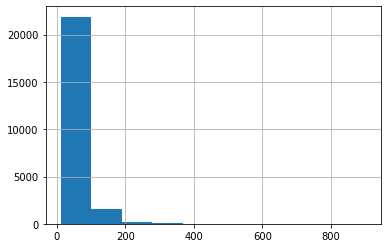

In [43]:
#гистограмма количество квартир от площади общей
data['total_area'].hist()

Количество предложений по продаже квартир максимально в основном с площадью до 70 м2

In [44]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

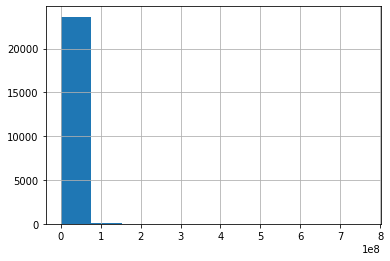

In [45]:
#гистограмма количество квартир от цены
data['last_price'].hist()

Соответсвенно и цена продажи этих квартир медиана 4,65е6

In [46]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

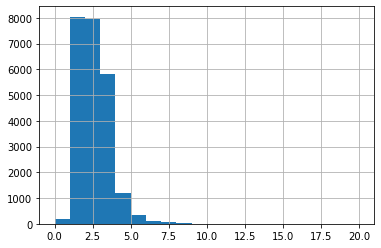

In [47]:
#гистограмма количество квартир от числа комнат
data['rooms'].hist(bins=20, range=(0, 20))

Продаются в основном однокомнатные, затем двухкомнатные и трехкомнатные

In [48]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

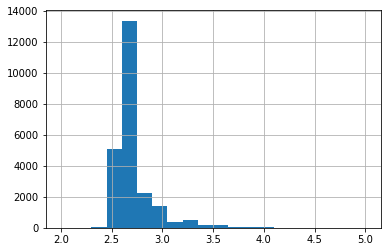

In [49]:
#гистограмма количество квартир от высоты потолков
data['ceiling_height'].hist(bins=20, range=(2, 5))

Максимальное количество квартир с высотой потолков 2,5 м, затем 2,7 м, 2,75 м и 3 м

In [50]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.718294
std          0.730035
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         32.000000
Name: ceiling_height, dtype: float64

In [51]:
#посмотрим что за квартира со 100 м потолками. Скорей всего ошибка в наборе данных. Ее можно выбросить
display(data[data['ceiling_height'] == 100].head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price,city_centers_nearest_km,mean_price_km,data_time,week_day,month,year,floor_id,ratio_living_total,ratio_kitchen_total


<AxesSubplot:>

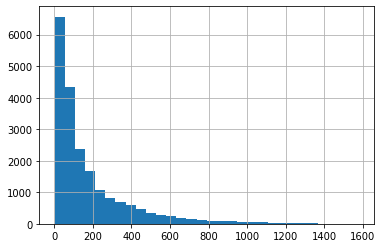

In [52]:
#гистограмма количество квартир от времени продаж
data['days_exposition'].hist(bins=30)

В 75% квартир продается за 232 дня, медиана продаж составляет 95 дней.
25% квартир продаются за 45 дней, хотя есть квартиры которые продались за 1 день

In [53]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [54]:
#посмотрим что за квартира проданная за 1 день. она очень дешевая поэтому продалась быстро
display(data[data['days_exposition'] == 1].head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price,city_centers_nearest_km,mean_price_km,data_time,week_day,month,year,floor_id,ratio_living_total,ratio_kitchen_total
1632,19,4000000.0,49.9,2019-05-01T00:00:00,2,2.5,9.0,25.0,1,False,False,False,10.0,0.0,Санкт-Петербург,13567.0,14384.0,1.0,20.0,1.0,681.0,1.0,80160.320641,14.0,5725.737189,2019-05-01,Wednesday,May,2019,Первый,0.501002,0.200401


<AxesSubplot:>

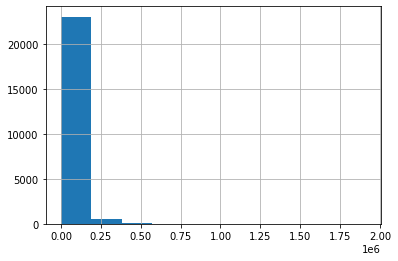

In [55]:
#гистограмма количество квартир от стоимости квадратного метра
data['price'].hist()

In [56]:
data['price'].describe()

count    2.369900e+04
mean     9.942166e+04
std      5.030680e+04
min      1.118349e+02
25%      7.658547e+04
50%      9.500000e+04
75%      1.142563e+05
max      1.907500e+06
Name: price, dtype: float64

In [57]:
#посмотрим что за квартира. она продалась быстро эксклюзивное предложние, можно отбросить на всю выборку не повлияет
display(data[data['price'] == 1.907500e+06].head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price,city_centers_nearest_km,mean_price_km,data_time,week_day,month,year,floor_id,ratio_living_total,ratio_kitchen_total
12971,19,763000000.0,400.0,2017-09-30T00:00:00,7,2.65,10.0,250.0,10,False,False,False,28.55,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0,1907500.0,4.0,476875.0,2017-09-30,Saturday,September,2017,Последний,0.625,0.071375


(-50.0, 175000.0)

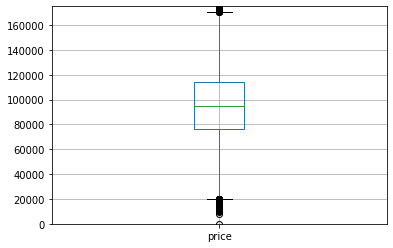

In [58]:
data.boxplot(column=['price'])
plt.ylim(-50, 175000)

In [59]:
#отбросим все квартиры со стоимостью квадратного метра больше 165500
data_drop = data.drop(data[data.price >165500].index)
display(data_drop)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price,city_centers_nearest_km,mean_price_km,data_time,week_day,month,year,floor_id,ratio_living_total,ratio_kitchen_total
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,16.0,7523.148148,2019-03-07,Thursday,March,2019,Другой,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,82920.792079,19.0,4364.252215,2018-12-04,Tuesday,December,2018,Первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,14.0,6627.551020,2015-08-20,Thursday,August,2015,Другой,0.612500,0.148214
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,8.0,12500.000000,2018-06-19,Tuesday,June,2018,Другой,0.320000,0.410000
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.4,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,NaN,NaN,2018-09-10,Monday,September,2018,Другой,0.473684,0.299342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72490.845228,4.0,18122.711307,2017-03-21,Tuesday,March,2017,Другой,0.547792,0.103356
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.0,4,False,False,False,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,52542.372881,NaN,NaN,2018-01-15,Monday,January,2018,Другой,0.644068,0.144068
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.7,1,False,False,False,10.00,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44091.710758,NaN,NaN,2018-02-11,Sunday,February,2018,Первый,0.523810,0.176367
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,39.6,12,False,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149511.400651,10.0,14951.140065,2017-03-28,Tuesday,March,2017,Другой,0.515961,0.303583


(-50.0, 175000.0)

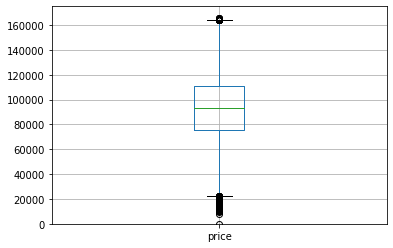

In [60]:
data_drop.boxplot(column=['price'])
plt.ylim(-50, 175000)

In [61]:
data_drop['price'].describe()

count     22640.000000
mean      92721.724260
std       28801.006125
min         111.834862
25%       75406.583398
50%       93465.003465
75%      110833.333333
max      165359.477124
Name: price, dtype: float64

(108.0, 110.0)

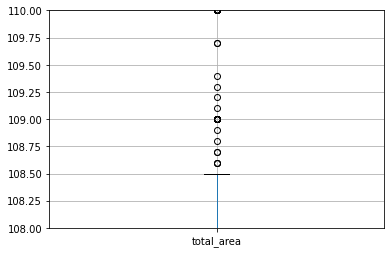

In [62]:
data_drop.boxplot(column=['total_area'])
plt.ylim(108, 110)

In [63]:
#отбросим все квартиры с плошадью больше 108.5
data_drop.drop(data_drop[data_drop.total_area >108.5].index, inplace=True)
display(data_drop)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price,city_centers_nearest_km,mean_price_km,data_time,week_day,month,year,floor_id,ratio_living_total,ratio_kitchen_total
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,16.0,7523.148148,2019-03-07,Thursday,March,2019,Другой,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,82920.792079,19.0,4364.252215,2018-12-04,Tuesday,December,2018,Первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,14.0,6627.551020,2015-08-20,Thursday,August,2015,Другой,0.612500,0.148214
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,8.0,12500.000000,2018-06-19,Tuesday,June,2018,Другой,0.320000,0.410000
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.4,5,False,False,False,9.1,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,NaN,NaN,2018-09-10,Monday,September,2018,Другой,0.473684,0.299342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,False,False,False,8.0,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,73717.948718,34.0,2168.174962,2016-08-05,Friday,August,2016,Другой,0.641026,0.128205
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.0,4,False,False,False,8.5,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,52542.372881,NaN,NaN,2018-01-15,Monday,January,2018,Другой,0.644068,0.144068
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.7,1,False,False,False,10.0,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44091.710758,NaN,NaN,2018-02-11,Sunday,February,2018,Первый,0.523810,0.176367
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,39.6,12,False,False,False,23.3,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149511.400651,10.0,14951.140065,2017-03-28,Tuesday,March,2017,Другой,0.515961,0.303583


<AxesSubplot:xlabel='total_area', ylabel='price'>

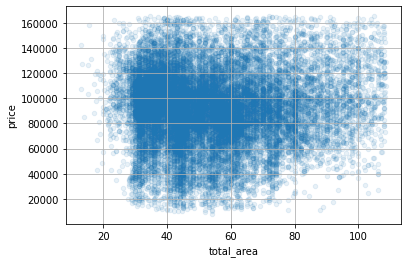

In [64]:
data_drop.plot(x='total_area', y='price', kind='scatter',alpha=0.1,grid=True)
#data.plot(x='total_area', y='price',kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

в основном продаются квартиры с ценой квадратного метра медиана 93465

<AxesSubplot:xlabel='rooms', ylabel='price'>

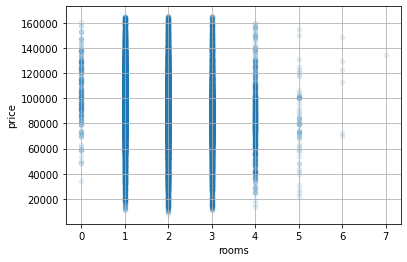

In [65]:
data_drop.plot(x='rooms', y='price', kind='scatter',alpha=0.1,grid=True,)

Зависимость цены от числа комнат есть как дорогие предложния так и дешевые, можно сказать особых нет

<AxesSubplot:xlabel='city_centers_nearest', ylabel='price'>

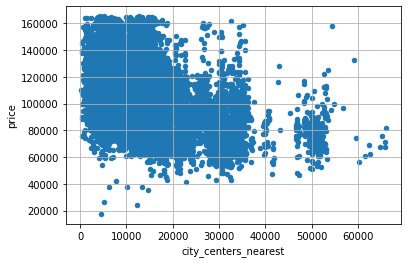

In [66]:
data_drop.plot(x='city_centers_nearest', y='price', kind='scatter',grid=True)

Чем дальше от центра тем дешевле квартиры

,price
floor_id,
Другой,96491.228070
Последний,85029.989095
Первый,80392.156863


<AxesSubplot:xlabel='floor_id'>

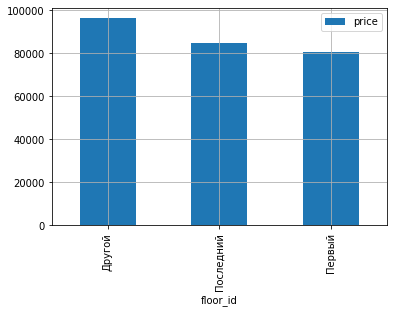

In [67]:
floor_id_group=data_drop.pivot_table(index='floor_id', values='price', aggfunc='median').sort_values(by='price',ascending = False)
display(floor_id_group)
floor_id_group.sort_values(by='price',ascending = False).plot(y='price',kind='bar',grid=True)

стоимость квартир зависит от этажности, самая низкая на первом, самая высокая на другом

,price
week_day,
Tuesday,93750.000000
Wednesday,93487.097914
Sunday,93011.473430
Thursday,92995.169082
Friday,92741.935484
Monday,92727.272727
Saturday,91595.107034


<AxesSubplot:xlabel='week_day'>

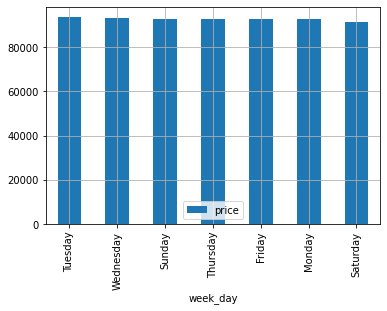

In [68]:
week_day_group=data_drop.pivot_table(index='week_day', values='price', aggfunc='median').sort_values(by='price',ascending = False)
display(week_day_group)
week_day_group.sort_values(by='price',ascending = False).plot(y='price',kind='bar',grid=True)

цена квадратного метра от дня недели зависит, к концу недели цена квадратного метра падает на 2000

,price
month,
April,94685.762955
August,94370.860927
September,93720.124283
November,93431.952663
March,93246.187364
January,93243.243243
July,93198.992443
February,93126.385809
October,92565.693919


<AxesSubplot:xlabel='month'>

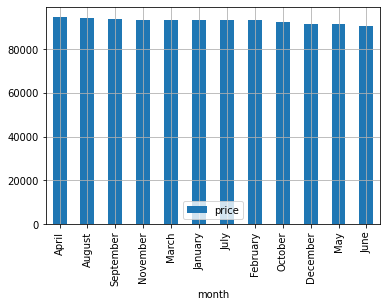

In [69]:
month_group=data_drop.pivot_table(index='month', values='price', aggfunc='median').sort_values(by='price',ascending = False)
display(month_group)
month_group.sort_values(by='price',ascending = False).plot(y='price',kind='bar',grid=True)

цена квадратного метра от месяца зависит, самая высокая цена в апреле, самая низкая в июне разница почти 4000

,price
year,
2014,98603.839442
2015,90835.360908
2016,90000.000000
2017,90596.175002
2018,94269.870610
2019,101415.094340


<AxesSubplot:xlabel='year'>

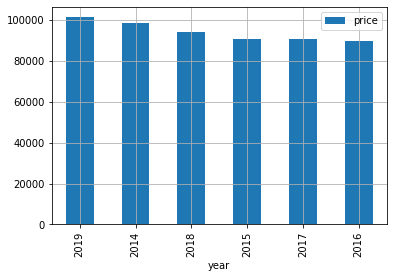

In [70]:
year_group=data_drop.pivot_table(index='year', values='price', aggfunc='median')
display(year_group)
year_group.sort_values(by='price',ascending = False).plot(y='price',kind='bar',grid=True)

цена квадратного метра от года объявления зависит, самый дорогой квадратный метр был в 2014 самый дешевый в 2016

,city_centers_nearest,floor,floors_total,kitchen_area,living_area,price
total_area,,,,,,
13.0,10714.000000,1.500000,7.000000,8.000000,18.400000,125000.000000
13.2,4165.000000,1.000000,5.000000,8.000000,18.400000,127727.272727
14.0,11122.000000,1.000000,5.000000,2.000000,11.000000,85000.000000
15.0,16376.000000,1.000000,7.000000,8.000000,18.400000,115000.000000
15.5,4589.000000,2.000000,5.000000,8.000000,10.000000,158064.516129
...,...,...,...,...,...,...
108.0,8567.923077,6.000000,12.240000,16.830769,63.146154,112403.382123
108.1,5783.000000,4.666667,7.333333,13.800000,71.666667,118796.339809
108.3,7171.000000,6.500000,12.500000,16.650000,65.875000,131265.000000


array([[<AxesSubplot:xlabel='city_centers_nearest', ylabel='city_centers_nearest'>,
        <AxesSubplot:xlabel='floor', ylabel='city_centers_nearest'>,
        <AxesSubplot:xlabel='floors_total', ylabel='city_centers_nearest'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='city_centers_nearest'>,
        <AxesSubplot:xlabel='living_area', ylabel='city_centers_nearest'>,
        <AxesSubplot:xlabel='price', ylabel='city_centers_nearest'>],
       [<AxesSubplot:xlabel='city_centers_nearest', ylabel='floor'>,
        <AxesSubplot:xlabel='floor', ylabel='floor'>,
        <AxesSubplot:xlabel='floors_total', ylabel='floor'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='floor'>,
        <AxesSubplot:xlabel='living_area', ylabel='floor'>,
        <AxesSubplot:xlabel='price', ylabel='floor'>],
       [<AxesSubplot:xlabel='city_centers_nearest', ylabel='floors_total'>,
        <AxesSubplot:xlabel='floor', ylabel='floors_total'>,
        <AxesSubplot:xlabel='floors_total', ylabel='f

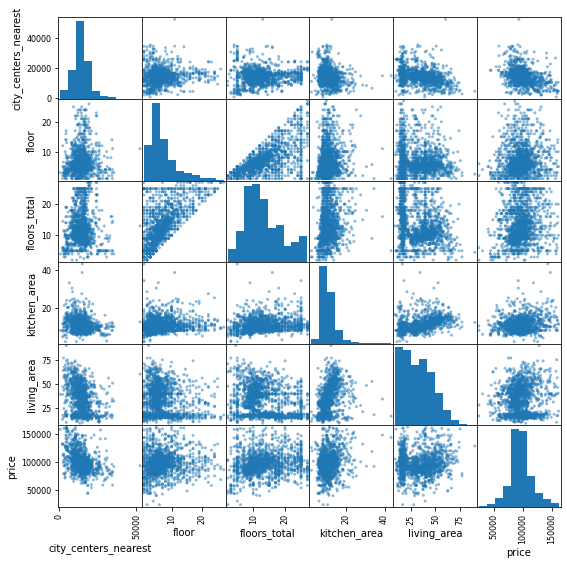

In [71]:
multi_drop=data_drop.pivot_table(index='total_area',values=['price','floors_total','floor','living_area','kitchen_area','city_centers_nearest'])
display(multi_drop)
pd.plotting.scatter_matrix(multi_drop, figsize=(9, 9)) #

In [72]:
data_drop.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price,city_centers_nearest_km,mean_price_km,ratio_living_total,ratio_kitchen_total
total_images,1.000000,0.168291,0.118959,0.089490,0.006475,0.014586,0.101849,0.033448,0.015402,-0.030655,-0.023308,0.071225,0.048341,-0.002540,-0.033880,0.006060,0.006037,-0.022046,-0.018737,-0.036319,0.131732,-0.033342,0.013631,0.008865,-0.048048
last_price,0.168291,1.000000,0.743662,0.459465,0.079579,0.190296,0.608240,0.131980,0.024405,-0.066934,-0.042147,0.505832,0.068979,-0.030456,-0.334233,0.120973,0.108801,0.138252,0.039427,0.083386,0.652313,-0.334936,0.394194,0.020549,-0.165728
total_area,0.118959,0.743662,1.000000,0.796734,0.070771,-0.017830,0.900984,-0.023932,0.021076,-0.116484,-0.070088,0.452739,0.062403,-0.020072,-0.156209,0.077630,0.053855,0.104270,0.027242,0.113733,0.025570,-0.156703,0.203743,0.209548,-0.452390
rooms,0.089490,0.459465,0.796734,1.000000,0.024139,-0.230218,0.871718,-0.173454,0.001791,-0.170834,-0.105040,0.077051,0.004634,-0.046243,-0.096681,0.069814,0.026658,0.034352,0.002836,0.082423,-0.167488,-0.096604,0.110317,0.509013,-0.657888
ceiling_height,0.006475,0.079579,0.070771,0.024139,1.000000,-0.009162,0.061238,-0.003650,0.017000,0.002936,0.026660,0.064159,0.024330,-0.023991,-0.070905,0.048499,0.023454,0.052397,0.001623,0.013197,0.040694,-0.070497,0.108943,0.008295,0.006746
floors_total,0.014586,0.190296,-0.017830,-0.230218,-0.009162,1.000000,-0.163734,0.675378,-0.020225,0.071242,0.052690,0.298588,0.167435,0.102105,-0.024393,-0.240141,-0.120559,-0.099732,-0.029012,-0.040833,0.355126,-0.025136,-0.168505,-0.345400,0.363565
living_area,0.101849,0.608240,0.900984,0.871718,0.061238,-0.163734,1.000000,-0.126245,0.017522,-0.074952,-0.042803,0.181476,0.029905,-0.045301,-0.139703,0.103880,0.049496,0.078021,0.017636,0.099573,-0.066360,-0.140037,0.178351,0.589080,-0.619376
floor,0.033448,0.131980,-0.023932,-0.173454,-0.003650,0.675378,-0.126245,1.000000,-0.011288,0.037042,0.037723,0.201927,0.161541,0.069139,-0.010080,-0.159487,-0.079560,-0.065076,-0.014927,-0.037596,0.257553,-0.010642,-0.106245,-0.249930,0.255633
is_apartment,0.015402,0.024405,0.021076,0.001791,0.017000,-0.020225,0.017522,-0.011288,1.000000,-0.003350,-0.002247,0.024891,0.035493,0.020013,0.015382,0.001354,-0.016780,0.004934,0.019438,-0.005547,0.015274,0.015422,-0.003926,0.002490,0.007935
studio,-0.030655,-0.066934,-0.116484,-0.170834,0.002936,0.071242,-0.074952,0.037042,-0.003350,1.000000,-0.004505,-0.033644,0.029086,-0.022922,-0.012154,-0.028214,-0.021329,0.006222,0.005996,-0.021538,0.041759,-0.012595,0.010297,0.093876,0.135129


,price,count
locality_name,,
Санкт-Петербург,120370.370370,13728
посёлок Мурино,87454.764777,522
посёлок Шушары,82920.792079,433
Всеволожск,75075.075075,394
Пушкин,122222.222222,344
Колпино,65753.424658,336
посёлок Парголово,99195.710456,325
Гатчина,64171.122995,304
деревня Кудрово,86206.896552,298


<AxesSubplot:xlabel='locality_name'>

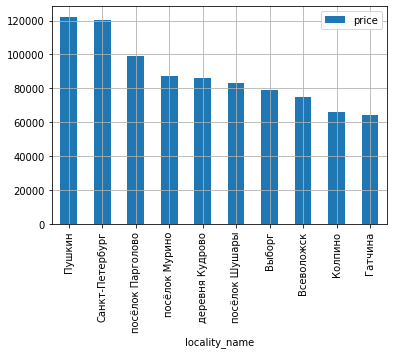

In [73]:
#Выберем 10 населенных пунктов с наибольшим числом объявлений
locality_name_group=data_drop.pivot_table(index='locality_name', values='price', aggfunc=['first', 'count'])
locality_name_group.columns = ['price', 'count']
top_10=locality_name_group.sort_values(by='count',ascending = False).head(10)
display(top_10)

# график цены от населенного пукта
top_10.sort_values(by='price',ascending = False).plot(y='price',kind='bar',grid=True)

Самая высокая стоимость жилья в населенном пункте Пушкин, самая низкая-Гатчина

In [74]:
data_drop.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price,city_centers_nearest_km,mean_price_km,ratio_living_total,ratio_kitchen_total
total_images,1.000000,0.168291,0.118959,0.089490,0.006475,0.014586,0.101849,0.033448,0.015402,-0.030655,-0.023308,0.071225,0.048341,-0.002540,-0.033880,0.006060,0.006037,-0.022046,-0.018737,-0.036319,0.131732,-0.033342,0.013631,0.008865,-0.048048
last_price,0.168291,1.000000,0.743662,0.459465,0.079579,0.190296,0.608240,0.131980,0.024405,-0.066934,-0.042147,0.505832,0.068979,-0.030456,-0.334233,0.120973,0.108801,0.138252,0.039427,0.083386,0.652313,-0.334936,0.394194,0.020549,-0.165728
total_area,0.118959,0.743662,1.000000,0.796734,0.070771,-0.017830,0.900984,-0.023932,0.021076,-0.116484,-0.070088,0.452739,0.062403,-0.020072,-0.156209,0.077630,0.053855,0.104270,0.027242,0.113733,0.025570,-0.156703,0.203743,0.209548,-0.452390
rooms,0.089490,0.459465,0.796734,1.000000,0.024139,-0.230218,0.871718,-0.173454,0.001791,-0.170834,-0.105040,0.077051,0.004634,-0.046243,-0.096681,0.069814,0.026658,0.034352,0.002836,0.082423,-0.167488,-0.096604,0.110317,0.509013,-0.657888
ceiling_height,0.006475,0.079579,0.070771,0.024139,1.000000,-0.009162,0.061238,-0.003650,0.017000,0.002936,0.026660,0.064159,0.024330,-0.023991,-0.070905,0.048499,0.023454,0.052397,0.001623,0.013197,0.040694,-0.070497,0.108943,0.008295,0.006746
floors_total,0.014586,0.190296,-0.017830,-0.230218,-0.009162,1.000000,-0.163734,0.675378,-0.020225,0.071242,0.052690,0.298588,0.167435,0.102105,-0.024393,-0.240141,-0.120559,-0.099732,-0.029012,-0.040833,0.355126,-0.025136,-0.168505,-0.345400,0.363565
living_area,0.101849,0.608240,0.900984,0.871718,0.061238,-0.163734,1.000000,-0.126245,0.017522,-0.074952,-0.042803,0.181476,0.029905,-0.045301,-0.139703,0.103880,0.049496,0.078021,0.017636,0.099573,-0.066360,-0.140037,0.178351,0.589080,-0.619376
floor,0.033448,0.131980,-0.023932,-0.173454,-0.003650,0.675378,-0.126245,1.000000,-0.011288,0.037042,0.037723,0.201927,0.161541,0.069139,-0.010080,-0.159487,-0.079560,-0.065076,-0.014927,-0.037596,0.257553,-0.010642,-0.106245,-0.249930,0.255633
is_apartment,0.015402,0.024405,0.021076,0.001791,0.017000,-0.020225,0.017522,-0.011288,1.000000,-0.003350,-0.002247,0.024891,0.035493,0.020013,0.015382,0.001354,-0.016780,0.004934,0.019438,-0.005547,0.015274,0.015422,-0.003926,0.002490,0.007935
studio,-0.030655,-0.066934,-0.116484,-0.170834,0.002936,0.071242,-0.074952,0.037042,-0.003350,1.000000,-0.004505,-0.033644,0.029086,-0.022922,-0.012154,-0.028214,-0.021329,0.006222,0.005996,-0.021538,0.041759,-0.012595,0.010297,0.093876,0.135129


In [75]:
#добавляем столбец id в top_10
top_10_id=[]
for i in range(len(top_10)):
    top_10_id.append(i)
    
top_10['id']=top_10_id
display(top_10)
display(top_10['count'].sum())

,price,count,id
locality_name,,,
Санкт-Петербург,120370.370370,13728,0
посёлок Мурино,87454.764777,522,1
посёлок Шушары,82920.792079,433,2
Всеволожск,75075.075075,394,3
Пушкин,122222.222222,344,4
Колпино,65753.424658,336,5
посёлок Парголово,99195.710456,325,6
Гатчина,64171.122995,304,7
деревня Кудрово,86206.896552,298,8


16911

In [76]:
#выбираем все значения из датасета для топ-10
good_data=data_drop.query('locality_name in @top_10.index')
display(good_data)



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price,city_centers_nearest_km,mean_price_km,data_time,week_day,month,year,floor_id,ratio_living_total,ratio_kitchen_total
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,16.0,7523.148148,2019-03-07,Thursday,March,2019,Другой,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,82920.792079,19.0,4364.252215,2018-12-04,Tuesday,December,2018,Первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,14.0,6627.551020,2015-08-20,Thursday,August,2015,Другой,0.612500,0.148214
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,8.0,12500.000000,2018-06-19,Tuesday,June,2018,Другой,0.320000,0.410000
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.6,6,False,False,False,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,0.0,0.0,0.0,155.0,99195.710456,19.0,5220.826866,2017-11-02,Thursday,November,2017,Другой,0.284182,0.386059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,9200000.0,101.00,2019-04-01T00:00:00,3,3.05,15.0,63.0,12,False,False,False,15.0,0.0,Санкт-Петербург,15632.0,14428.0,0.0,0.0,0.0,0.0,23.0,91089.108911,14.0,6506.364922,2019-04-01,Monday,April,2019,Другой,0.623762,0.148515
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,False,False,False,9.1,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0,100566.572238,16.0,6285.410765,2018-02-28,Wednesday,February,2018,Другой,0.461756,0.257790
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,2.65,5.0,31.0,2,False,False,False,6.0,0.0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,0.0,15.0,105769.230769,6.0,17628.205128,2018-07-19,Thursday,July,2018,Другой,0.596154,0.115385
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,False,False,False,10.6,1.0,Санкт-Петербург,19424.0,4489.0,0.0,0.0,1.0,806.0,519.0,129903.978052,4.0,32475.994513,2016-10-13,Thursday,October,2016,Другой,0.552812,0.145405


<AxesSubplot:xlabel='city_centers_nearest', ylabel='price'>

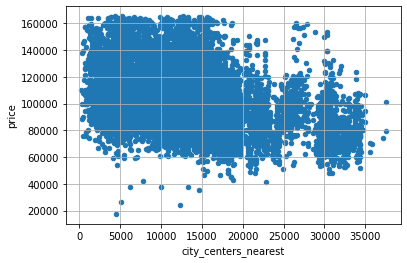

In [77]:
good_data.plot(x='city_centers_nearest',y='price',kind='scatter',grid=True)


<AxesSubplot:xlabel='city_centers_nearest_km', ylabel='mean_price_km'>

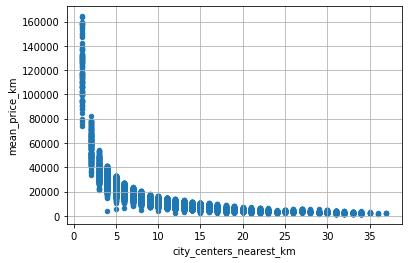

In [78]:
good_data.plot(x='city_centers_nearest_km',y='mean_price_km',kind='scatter',grid=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price,city_centers_nearest_km,mean_price_km,data_time,week_day,month,year,floor_id,ratio_living_total,ratio_kitchen_total
24,8,6500000.0,97.2,2015-10-31T00:00:00,2,2.65,3.0,46.5,1,False,False,False,19.6,0.0,Санкт-Петербург,20052.0,2336.0,3.0,411.0,3.0,124.0,265.0,66872.427984,2.0,33436.213992,2015-10-31,Saturday,October,2015,Первый,0.478395,0.201646
61,18,7990000.0,74.0,2017-08-24T00:00:00,2,2.65,4.0,43.0,4,False,False,False,20.0,0.0,Санкт-Петербург,22568.0,4288.0,1.0,363.0,0.0,0.0,609.0,107972.972973,4.0,26993.243243,2017-08-24,Thursday,August,2017,Последний,0.581081,0.270270
94,3,3500000.0,29.5,2019-04-26T00:00:00,1,2.50,5.0,15.6,2,False,False,False,5.5,1.0,Санкт-Петербург,12921.0,7303.0,0.0,0.0,0.0,0.0,4.0,118644.067797,7.0,16949.152542,2019-04-26,Friday,April,2019,Другой,0.528814,0.186441
99,32,9600000.0,90.0,2017-09-26T00:00:00,4,2.65,5.0,67.0,2,False,False,False,8.0,0.0,Санкт-Петербург,23277.0,2818.0,0.0,0.0,0.0,0.0,104.0,106666.666667,3.0,35555.555556,2017-09-26,Tuesday,September,2017,Другой,0.744444,0.088889
111,4,4590000.0,40.0,2017-05-29T00:00:00,1,2.65,6.0,18.0,1,False,False,False,10.0,0.0,Санкт-Петербург,20062.0,6175.0,1.0,241.0,0.0,0.0,31.0,114750.000000,6.0,19125.000000,2017-05-29,Monday,May,2017,Первый,0.450000,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23648,14,10100000.0,78.0,2017-05-12T00:00:00,3,3.27,5.0,48.6,5,False,False,False,8.2,0.0,Санкт-Петербург,20933.0,1113.0,1.0,621.0,2.0,117.0,621.0,129487.179487,1.0,129487.179487,2017-05-12,Friday,May,2017,Последний,0.623077,0.105128
23665,11,4250000.0,47.0,2016-05-20T00:00:00,1,2.65,6.0,18.2,1,False,False,False,14.6,0.0,Санкт-Петербург,20503.0,4946.0,2.0,624.0,1.0,519.0,131.0,90425.531915,5.0,18085.106383,2016-05-20,Friday,May,2016,Первый,0.387234,0.310638
23681,13,5250000.0,43.0,2018-05-11T00:00:00,2,2.50,5.0,29.0,2,False,False,False,6.0,0.0,Санкт-Петербург,28323.0,7262.0,1.0,497.0,2.0,660.0,80.0,122093.023256,7.0,17441.860465,2018-05-11,Friday,May,2018,Другой,0.674419,0.139535
23690,3,5500000.0,52.0,2018-07-19T00:00:00,2,2.65,5.0,31.0,2,False,False,False,6.0,0.0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,0.0,15.0,105769.230769,6.0,17628.205128,2018-07-19,Thursday,July,2018,Другой,0.596154,0.115385


<AxesSubplot:xlabel='city_centers_nearest_km', ylabel='mean_price_km'>

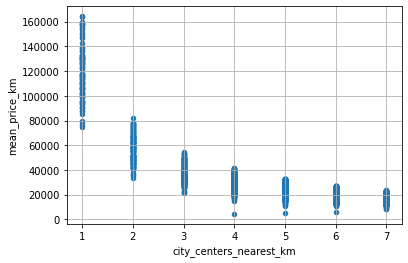

In [79]:
centers_good_data=good_data.query('city_centers_nearest_km<8')
display(centers_good_data)
centers_good_data.plot(x='city_centers_nearest_km',y='mean_price_km',kind='scatter',grid=True)

<AxesSubplot:>

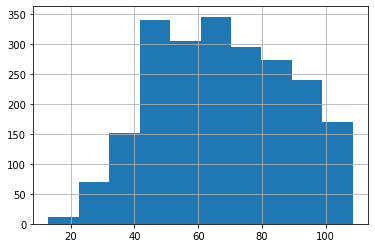

In [80]:
#гистограмма количество квартир от площади общей
centers_good_data['total_area'].hist()

In [81]:
centers_good_data['total_area'].describe()

count    2201.000000
mean       67.600591
std        20.866200
min        13.000000
25%        50.500000
50%        67.500000
75%        84.200000
max       108.500000
Name: total_area, dtype: float64

В центре количество квартир предлагается с большей площадью, здесь 75% квартир с площадью 84 м2, в первоначальном варианте было 70 м2

<AxesSubplot:>

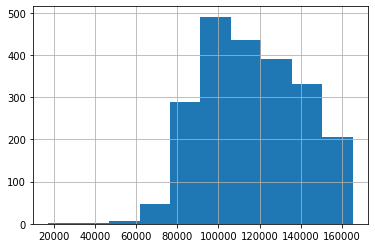

In [82]:
#гистограмма количество квартир от цены
centers_good_data['price'].hist()

Соответсвенно и цена продажи этих квартир медиана 114864

In [83]:
centers_good_data['price'].describe()

count      2201.000000
mean     116317.121846
std       23741.929568
min       17391.304348
25%       97656.250000
50%      114864.864865
75%      135306.748466
max      165238.095238
Name: price, dtype: float64

<AxesSubplot:>

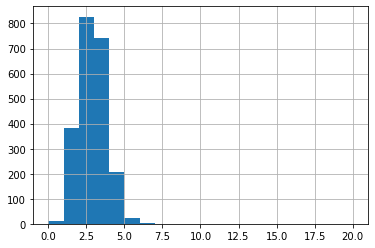

In [84]:
#гистограмма количество квартир от числа комнат
centers_good_data['rooms'].hist(bins=20, range=(0, 20))

Продаются в основном двухкомнатные и трехкомнатные

In [85]:
centers_good_data['rooms'].describe()

count    2201.000000
mean        2.379827
std         0.946876
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         7.000000
Name: rooms, dtype: float64

<AxesSubplot:>

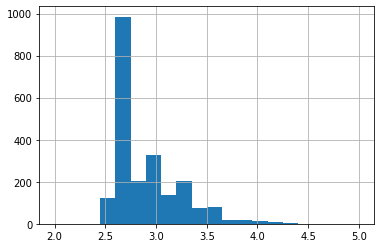

In [86]:
#гистограмма количество квартир от высоты потолков
centers_good_data['ceiling_height'].hist(bins=20, range=(2, 5))

Максимальное количество квартир с высотой потолков 2.75 м, затем 3,0 м, 3.25 м 

In [87]:
centers_good_data['ceiling_height'].describe()

count    2201.000000
mean        2.898514
std         0.703065
min         2.400000
25%         2.650000
50%         2.720000
75%         3.050000
max        32.000000
Name: ceiling_height, dtype: float64

,price
floor_id,
Другой,118663.594470
Последний,109941.520468
Первый,103703.703704


<AxesSubplot:xlabel='floor_id'>

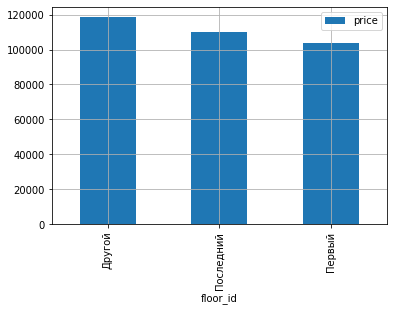

In [88]:
floor_id_centers_group=centers_good_data.pivot_table(index='floor_id', values='price', aggfunc='median').sort_values(by='price',ascending = False)
display(floor_id_centers_group)
floor_id_centers_group.sort_values(by='price',ascending = False).plot(y='price',kind='bar',grid=True)

стоимость квартир зависит от этажности, самая низкая на первом, самая высокая на другом

,price
week_day,
Saturday,120000.000000
Sunday,116885.964912
Friday,116257.225434
Tuesday,114017.543860
Wednesday,113848.202397
Monday,113628.981394
Thursday,113211.118150


<AxesSubplot:xlabel='week_day'>

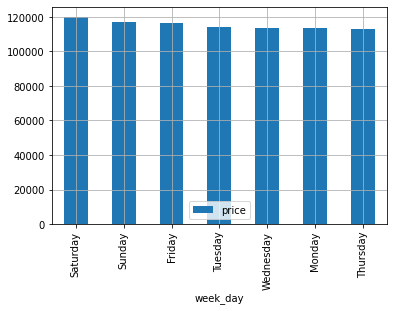

In [89]:
week_day_centers_group=centers_good_data.pivot_table(index='week_day', values='price', aggfunc='median').sort_values(by='price',ascending = False)
display(week_day_centers_group)
week_day_centers_group.sort_values(by='price',ascending = False).plot(y='price',kind='bar',grid=True)

цена квадратного метра от дня недели зависит, к концу недели цена квадратного метра падает на 7000

,price
month,
March,124742.268041
September,118646.080760
August,116252.821670
April,115705.765408
October,115331.411281
December,114333.829341
February,114057.057057
May,113333.333333
July,112195.121951


<AxesSubplot:xlabel='month'>

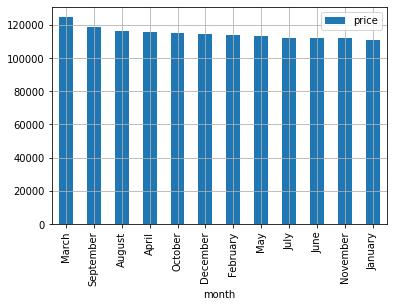

In [90]:
month_centers_group=centers_good_data.pivot_table(index='month', values='price', aggfunc='median').sort_values(by='price',ascending = False)
display(month_centers_group)
month_centers_group.sort_values(by='price',ascending = False).plot(y='price',kind='bar',grid=True)

цена квадратного метра от месяца зависит, самая высокая цена в марте, самая низкая в январе разница почти 5000

,price
year,
2019,125125.418060
2018,116458.955224
2017,113301.865497
2016,110335.371982
2015,110132.210185
2014,107000.000000


<AxesSubplot:xlabel='year'>

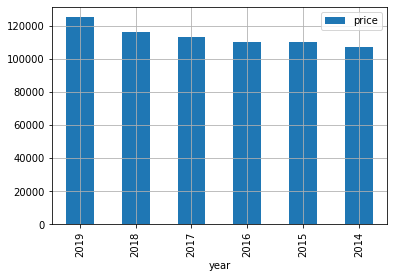

In [91]:
year_centers_group=centers_good_data.pivot_table(index='year', values='price', aggfunc='median').sort_values(by='price',ascending = False)
display(year_centers_group)
year_centers_group.sort_values(by='price',ascending = False).plot(y='price',kind='bar',grid=True)

цена квадратного метра от года объявления зависит, самый дорогой квадратный метр был в 2019 самый дешевый в 2014

,city_centers_nearest,floor,floors_total,kitchen_area,living_area,price
total_area,,,,,,
13.0,10714.00,1.500000,7.000000,8.000,18.400000,125000.000000
13.2,4165.00,1.000000,5.000000,8.000,18.400000,127727.272727
14.0,11122.00,1.000000,5.000000,2.000,11.000000,85000.000000
15.0,16376.00,1.000000,9.000000,8.000,18.400000,103333.333333
15.5,4589.00,2.000000,5.000000,8.000,10.000000,158064.516129
...,...,...,...,...,...,...
108.0,7948.52,6.080000,12.541667,16.944,62.552000,112088.406296
108.1,5783.00,4.666667,7.333333,13.800,71.666667,118796.339809
108.3,7171.00,6.500000,12.500000,16.650,65.875000,131265.000000


array([[<AxesSubplot:xlabel='city_centers_nearest', ylabel='city_centers_nearest'>,
        <AxesSubplot:xlabel='floor', ylabel='city_centers_nearest'>,
        <AxesSubplot:xlabel='floors_total', ylabel='city_centers_nearest'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='city_centers_nearest'>,
        <AxesSubplot:xlabel='living_area', ylabel='city_centers_nearest'>,
        <AxesSubplot:xlabel='price', ylabel='city_centers_nearest'>],
       [<AxesSubplot:xlabel='city_centers_nearest', ylabel='floor'>,
        <AxesSubplot:xlabel='floor', ylabel='floor'>,
        <AxesSubplot:xlabel='floors_total', ylabel='floor'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='floor'>,
        <AxesSubplot:xlabel='living_area', ylabel='floor'>,
        <AxesSubplot:xlabel='price', ylabel='floor'>],
       [<AxesSubplot:xlabel='city_centers_nearest', ylabel='floors_total'>,
        <AxesSubplot:xlabel='floor', ylabel='floors_total'>,
        <AxesSubplot:xlabel='floors_total', ylabel='f

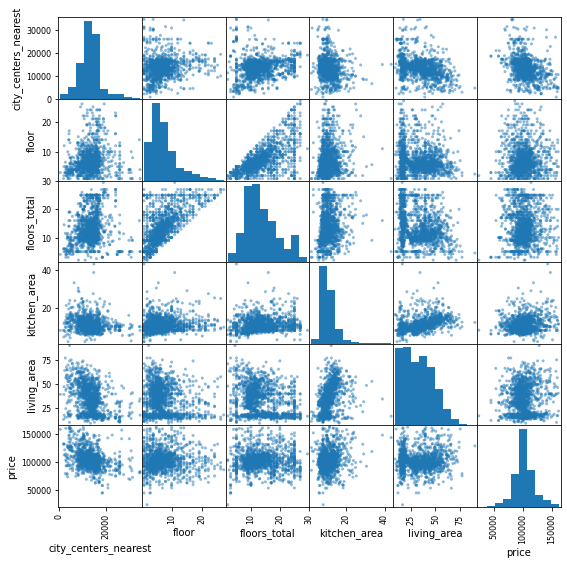

In [92]:
multi=good_data.pivot_table(index='total_area',values=['price','floors_total','floor','living_area','kitchen_area','city_centers_nearest'])
display(multi)
pd.plotting.scatter_matrix(multi, figsize=(9, 9)) #

In [93]:
good_data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price,city_centers_nearest_km,mean_price_km,ratio_living_total,ratio_kitchen_total
total_images,1.000000,0.169059,0.110868,0.085243,0.010458,0.004142,0.094804,0.026163,0.015731,-0.031381,-0.026164,0.066768,0.052033,0.010974,-0.018048,0.014837,0.005028,-0.015774,-0.016970,-0.041498,0.143714,-0.017455,0.010587,0.008382,-0.049427
last_price,0.169059,1.000000,0.808373,0.530383,0.093824,0.051639,0.678762,0.037896,0.019977,-0.084593,-0.053591,0.509429,0.056651,0.002094,-0.339859,0.144590,0.110956,0.161535,0.037083,0.111945,0.532744,-0.340774,0.383739,0.062272,-0.236076
total_area,0.110868,0.808373,1.000000,0.796927,0.084139,-0.048846,0.902107,-0.044340,0.015549,-0.119482,-0.073572,0.454819,0.045164,-0.007087,-0.175650,0.099965,0.060120,0.125017,0.030395,0.125624,-0.029751,-0.176314,0.203322,0.212497,-0.459721
rooms,0.085243,0.530383,0.796927,1.000000,0.031827,-0.257173,0.870607,-0.188192,-0.001855,-0.175725,-0.107999,0.085260,-0.010033,-0.045679,-0.130644,0.087663,0.032760,0.043631,0.005910,0.085140,-0.215510,-0.130467,0.112994,0.509485,-0.659080
ceiling_height,0.010458,0.093824,0.084139,0.031827,1.000000,-0.016571,0.071821,-0.007253,0.018597,0.003645,0.035180,0.073244,0.024518,-0.028798,-0.097559,0.052613,0.023402,0.054561,0.002568,0.014172,0.044703,-0.097026,0.112973,0.007521,0.003656
floors_total,0.004142,0.051639,-0.048846,-0.257173,-0.016571,1.000000,-0.195877,0.657944,-0.024650,0.064623,0.056540,0.272514,0.180961,0.168871,0.145416,-0.239019,-0.131431,-0.088222,-0.035628,-0.031669,0.194939,0.144207,-0.207866,-0.364807,0.363083
living_area,0.094804,0.678762,0.902107,0.870607,0.071821,-0.195877,1.000000,-0.144192,0.012297,-0.076237,-0.042854,0.185143,0.014090,-0.041457,-0.181670,0.122775,0.055983,0.090752,0.020968,0.106526,-0.113365,-0.182025,0.181970,0.588517,-0.625200
floor,0.026163,0.037896,-0.044340,-0.188192,-0.007253,0.657944,-0.144192,1.000000,-0.012559,0.030771,0.037183,0.180283,0.166431,0.113056,0.101092,-0.155600,-0.084231,-0.055780,-0.017022,-0.032757,0.152879,0.100241,-0.129707,-0.254806,0.249842
is_apartment,0.015731,0.019977,0.015549,-0.001855,0.018597,-0.024650,0.012297,-0.012559,1.000000,-0.003608,-0.002448,0.021535,0.039512,0.020437,0.018943,-0.001503,-0.016211,0.006999,0.021880,-0.006144,0.012244,0.019001,-0.003952,0.000834,0.010960
studio,-0.031381,-0.084593,-0.119482,-0.175725,0.003645,0.064623,-0.076237,0.030771,-0.003608,1.000000,-0.004809,-0.039012,0.025412,-0.019123,-0.002003,-0.028247,-0.021992,0.006851,0.004917,-0.019670,0.037844,-0.002622,0.007958,0.100940,0.134236


### Вывод

**Для всех населенных пунктов**

1. Количество предложений по продаже квартир максимально в основном с площадью до 70 м2, медиана 52 м2 
2. Соответсвенно и цена продажи этих квартир медиана 4,65е6
3. Продаются в основном однокомнатные, затем двухкомнатные и трехкомнатные
4. Максимальное количество квартир с высотой потолков 2,5 м, затем 2,7 м, 2,75 м и 3 м
5. В 75% квартир продается за 232 дня, медиана продаж составляет 95 дней. 25% квартир продаются за 45 дней, хотя есть квартиры которые продались за 1 день
6. В основном продаются квартиры с ценой квадратного метра до 93465 остальное выскок либо эксклюзив
7. Зависимость цены от числа комнат просматривается но не значительно
8. Чем дальше от центра тем дешевле квартиры
9. Стоимость квартир зависит от этажности, самая низкая на первом, самая высокая на другом
10. Цена квадратного метра от дня недели зависит, к концу недели цена квадратного метра падает на 2000 
11. Цена квадратного метра от месяца зависит, самая высокая цена в апреле, самая низкая в июне разница почти 4000
12. Цена квадратного метра от года объявления зависит, самый дорогой квадратный метр был в 2014 самый дешевый в 2016
13. Самая высокая стоимость жилья в населенном пункте Пушкин, самая низкая-Гатчина при выборе из 10 населенных пунктов


**Для центра**
 
1. В центре количество квартир предлагается с большей площадью, здесь 75% квартир с площадью 84 м2, в первоначальном варианте было 70 м2
2. Соответсвенно и цена продажи этих квартир медиана 114864
3. Продаются в основном двухкомнатные и трехкомнатные
4. Стоимость квартир зависит от этажности, самая низкая на первом, самая высокая на другом
5. Цена квадратного метра от дня недели зависит, к концу недели цена квадратного метра падает на 7000
6. Цена квадратного метра от месяца зависит, самая высокая цена в марте, самая низкая в январе разница почти 5
7. Цена квадратного метра от года объявления зависит, самый дорогой квадратный метр был в 2019 самый дешевый в 2014

 


## Общий вывод

Провели анализ квартир выявили следующие закономерности:
1. На каком этаже квартира
2. От того когда было подано заявление
3. От удаленности от центра
4. В центре квартиры более просторные и соответсвенно цена выше
5. Основные закономерности характерны, как для всех населенных пунктов, так и для центра, ну кроме эксклюзива.